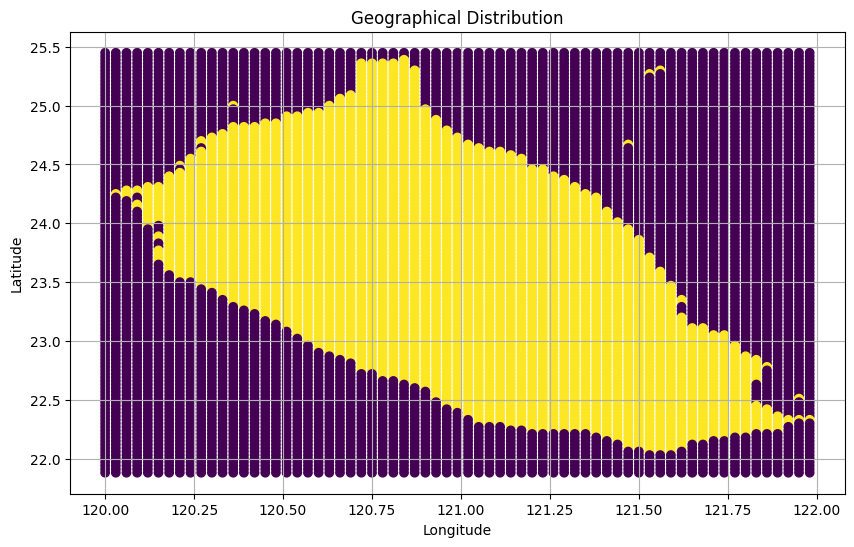

In [25]:
# Visualization of data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('classification_dataset.csv')

plt.figure(figsize=(10, 6))
plt.scatter(df['經度'], df['緯度'], c=df['label'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution')
plt.grid(True)
plt.show()

In [33]:
# Tree model for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('classification_dataset.csv')
X = df[['經度', '緯度']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"模型準確率: {accuracy*100:.2f}%")

模型準確率: 98.20%


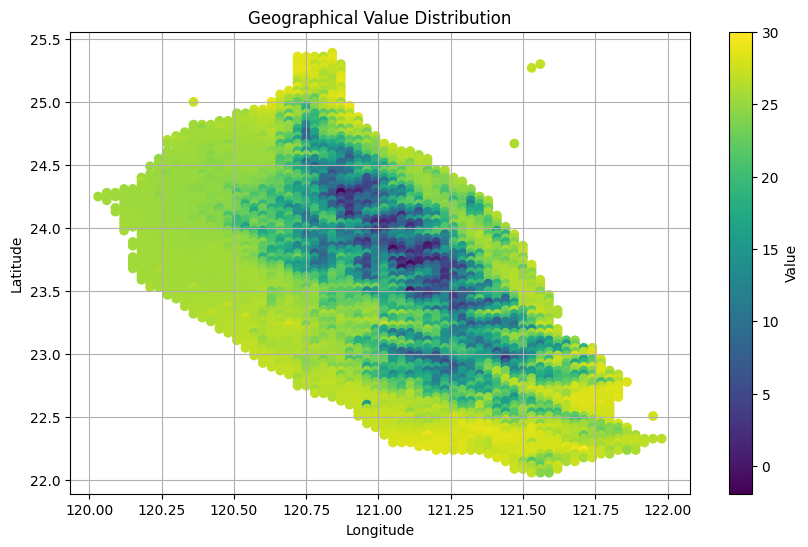

In [ ]:
# Visualize regression data
df = pd.read_csv('regression_dataset.csv')
plt.figure(figsize=(10, 6))
plt.scatter(df['經度'], df['緯度'], c=df['溫度'], cmap='viridis')
plt.colorbar(label='Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Value Distribution')
plt.grid(True)
plt.show()

In [65]:
# Tree model for regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

X = df[['經度', '緯度']]
y = df['溫度'] 

# standarize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f"R^2: {model.score(X_test, y_test):.2f}")
mse = mean_squared_error(y_test, predictions)
print(f"mse: {mse:.4f}")

R^2: 0.75
mse: 8.3379


n_estimators=10, MSE=5.3728
n_estimators=50, MSE=4.8277
n_estimators=100, MSE=4.8777
n_estimators=200, MSE=4.8650
n_estimators=300, MSE=4.8630
n_estimators=400, MSE=4.8630
n_estimators=500, MSE=4.8607
n_estimators=700, MSE=4.8645
n_estimators=1000, MSE=4.8654


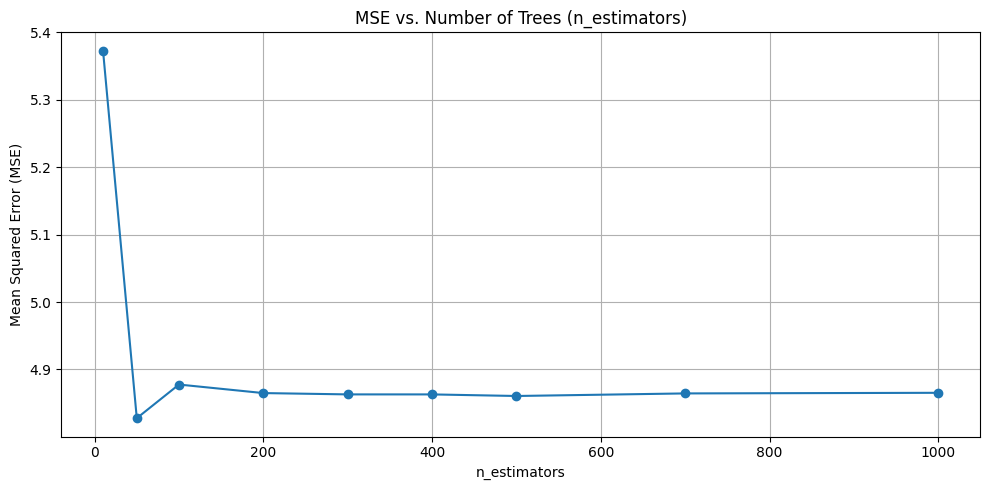

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 定義要測試的樹的數量
n_estimators_list = [10, 50, 100, 200, 300, 400, 500, 700, 1000]
mse_list = []

# 測試不同的 n_estimators
for n in n_estimators_list:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    print(f"n_estimators={n}, MSE={mse:.4f}")

# 畫圖
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_list, mse_list, marker='o')
plt.title('MSE vs. Number of Trees (n_estimators)')
plt.xlabel('n_estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.tight_layout()
plt.show()

Epoch [10/500], Loss: 10.5175
Epoch [20/500], Loss: 9.7483
Epoch [30/500], Loss: 9.3410
Epoch [40/500], Loss: 8.4596
Epoch [50/500], Loss: 8.3397
Epoch [60/500], Loss: 8.4979
Epoch [70/500], Loss: 8.2834
Epoch [80/500], Loss: 7.9116
Epoch [90/500], Loss: 7.9928
Epoch [100/500], Loss: 7.7917
Epoch [110/500], Loss: 7.9323
Epoch [120/500], Loss: 7.6809
Epoch [130/500], Loss: 7.7074
Epoch [140/500], Loss: 7.7791
Epoch [150/500], Loss: 7.6929
Epoch [160/500], Loss: 7.7267
Epoch [170/500], Loss: 7.6684
Epoch [180/500], Loss: 7.5862
Epoch [190/500], Loss: 7.4093
Epoch [200/500], Loss: 7.5225
Epoch [210/500], Loss: 7.5566
Epoch [220/500], Loss: 7.2315
Epoch [230/500], Loss: 7.6749
Epoch [240/500], Loss: 7.1958
Epoch [250/500], Loss: 7.1188
Epoch [260/500], Loss: 6.8977
Epoch [270/500], Loss: 6.7576
Epoch [280/500], Loss: 6.8276
Epoch [290/500], Loss: 6.7384
Epoch [300/500], Loss: 6.6666
Epoch [310/500], Loss: 6.5043
Epoch [320/500], Loss: 6.2979
Epoch [330/500], Loss: 6.5222
Epoch [340/500], L

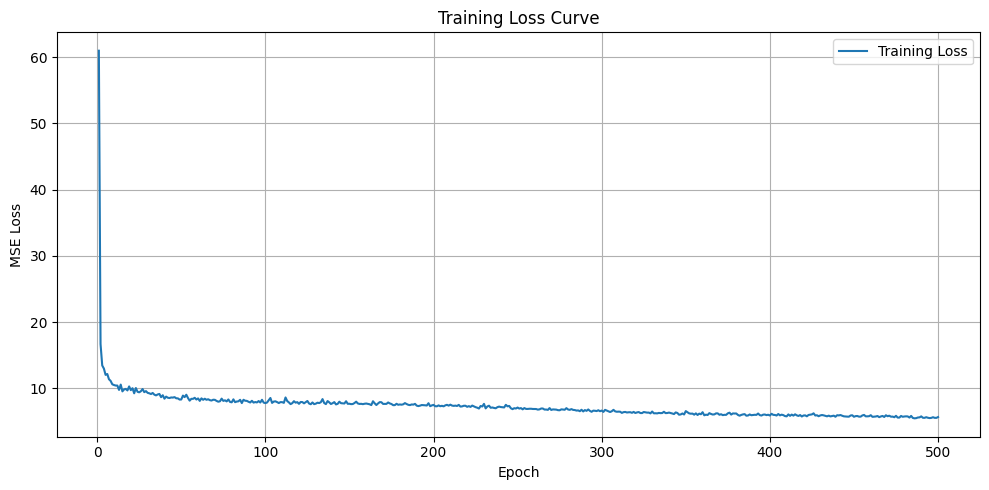

In [77]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset


class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(SimpleNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.Linear(hidden_size2, hidden_size3),
            nn.ReLU(),
            nn.Linear(hidden_size3, output_size)
        )

    def forward(self, x):
        return self.model(x)


df = pd.read_csv('regression_dataset.csv')
X = df[['經度', '緯度']].values
y = df['溫度'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

train_dataset = TensorDataset(
    torch.tensor(X_train, dtype=torch.float32),
    torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

model = SimpleNN(input_size=2, hidden_size1=128, hidden_size2=64, hidden_size3=32, output_size=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01) 

num_epochs = 500
epoch_losses = []

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for inputs, targets in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * inputs.size(0)

    epoch_loss /= len(train_loader.dataset)
    epoch_losses.append(epoch_loss)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')

# 測試模型
with torch.no_grad():
    test_inputs = torch.tensor(X_test, dtype=torch.float32)
    test_targets = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)
    test_outputs = model(test_inputs)
    test_loss = criterion(test_outputs, test_targets)
    print(f'Test MSE: {test_loss.item():.4f}')

# 畫 loss 圖
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), epoch_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()